# Coding Categorical Variable for Penalized Linear Regression

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
x_list = []
labels = []
data_path = './data/abalone.data'

with open(data_path) as data:
    
    for line in data:
        # split on semicolon
        row = line.strip().split(',')
        
        # put labels in separate array and remove label from row
        labels.append(float(row.pop()))
        
        # form list of lists of attributes (all strings)
        x_list.append(row)

In [3]:
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rigns']

# code three-valued sex attribute as numeric
x_coded = []

for row in x_list:
    
    # first code the three-valued sex variable
    coded_sex = [0.0, 0.0]
    
    if row[0] == 'M':
        coded_sex[0] = 1.0
        
    if row[0] == 'F':
        coded_sex[1] = 1.0
        
    num_row = [float(row[i]) for i in range(1, len(row))]
    row_coded = list(coded_sex) + num_row
    x_coded.append(row_coded)

In [4]:
names_coded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rigns']

n_rows = len(x_coded)
n_cols = len(x_coded[1])

x_means = []
x_sd = []

for i in range(n_cols):
    col = [x_coded[j][i] for j in range(n_rows)]
    mean = sum(col)/n_rows
    x_means.append(mean)
    
    col_diff = [(x_coded[j][i] - mean) for j in range(n_rows)]
    sum_sq = sum([col_diff[i] ** 2 for i in range(n_rows)])
    std_dev = sqrt(sum_sq/n_rows)
    x_sd.append(std_dev)
    
# use calculated mean and standard deviation to normalize x_coded
x_normalized = []

for i in range(n_rows):
    row_normalized = [(x_coded[i][j] - x_means[j])/x_sd[j] for j in range(n_cols)]
    x_normalized.append(row_normalized)
    
# normalize labels
mean_label = sum(labels)/n_rows
sd_label = sqrt(sum([(labels[i] - mean_label) * (labels[i] - mean_label) for i in range(n_rows)])/n_rows)
label_normalized = [(labels[i] - mean_label)/sd_label for i in range(n_rows)]

In [5]:
# initialize a vector of coefficients beta
beta = [0.0] * n_cols

# initialize matrix of betas at each step
beta_mat = []
beta_mat.append(list(beta))

# number of steps to take
n_steps = 350
step_size = 0.004
nz_list = []

for i in range(n_steps):
    #calculate residuals
    residuals = [0.0] * n_rows
    
    for j in range(n_rows):
        labels_hat = sum([x_normalized[j][k] * beta[k] for k in range(n_cols)])
        residuals[j] = label_normalized[j] - labels_hat
        
    # calculate correlation between attribute colums from normalized wine and residual
    corr = [0.0] * n_cols
    
    for j in range(n_cols):
        corr[j] = sum([x_normalized[k][j] * residuals[k] for k in range(n_rows)])/n_rows
        
    i_star = 0
    corr_star = corr[0]
    
    for j in range(1, n_cols):
        
        if abs(corr_star) < abs(corr[j]):
            i_star = j
            corr_star = corr[j]
            
    beta[i_star] += step_size * corr_star/abs(corr_star)
    beta_mat.append(list(beta))
    
    nz_beta = [index for index in range(n_cols) if beta[index] != 0.0]
    
    for q in nz_beta:
        
        if not (q in nz_list):
            nz_list.append(q)

name_list = [names_coded[nz_list[i]] for i in range(len(nz_list))]
print(name_list)

['Shell weight', 'Height', 'Sex2', 'Shucked weight', 'Diameter', 'Sex1']


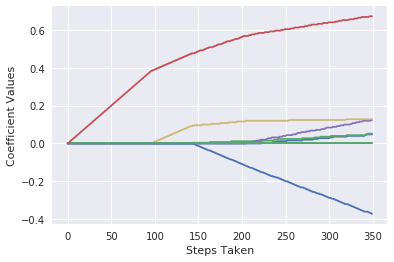

In [6]:
for i in range(n_cols):
    # plot range of beta values for each attribute
    coef_curve = [beta_mat[k][i] for k in range(n_steps)]
    x_axis = range(n_steps)
    plt.plot(x_axis, coef_curve)
    
plt.xlabel('Steps Taken')
plt.ylabel('Coefficient Values')
plt.show()